# Logical structure and dependencies. 
When solving models it is useful to be able to use the causal (logical) structure of the model. By identifying equations which comprise simultaneous block (contain feedback looks) and recursive 
blocks the model can be divided into smaller sub-models. Only simultaneous equations have to be solved iterative the recursive equations have to be [topological sorted](https://en.wikipedia.org/wiki/Topological_sorting) and then calculated. 

Also it can be useful for the developer and user to be able to use the logical structure to 
understand the the models structure and how it works. 


In this chapter different ways to look at the logical structure is explorer. <br>
The logical structure can be viewed as a [directed graph](https://en.wikipedia.org/wiki/Directed_graph). Different graphs are relevant depending on the purpose. <br>

 - The Python package [networkx](https://networkx.org/) is used to store and analyze graphs 
 - The program [Graphviz](https://graphviz.org/) is used to draw nice looking graphs basen on scripts in the dot language
 - The model class writes dot scripts based on the Networkx directed graphs.  
 
The model class contains a number of methods and properties which uses the dependency graphs. A subset is exposed in this chapter. 

## Background

An introduction to causal analysis of models can be found in {cite:author}`kogiku1968`(1968) a more elaborate text is here {cite:author}`Berndsen1995`(1995). 

In [1]:
from modelclass import model 

In [2]:
%load_ext autoreload
%autoreload 2

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. 
The next cell:
 - Loads model and simulates to establish a baseline
 - Creates a dataframe with a tax rate of 29 USD/Ton for carbon emission for 3 sectors
 - Simulates the new experiment 
 
 You can find more on this experiment [here](../update/create_experiment.ipynb)

In [3]:
mpak,baseline = model.modelload('../../models/pak.pcim',alfa=0.7,run=1)
alternative  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")
result = mpak(alternative,2020,2100) # simulates the model 

## What is the dependency graph 

Modelflow maintains graphs (networks) of the logical structure of a model. 

## Trace upstream variables: 
The equation for **GDP**

In [4]:
mpak.PAKNYGDPMKTPKN.frml

Endogeneous: PAKNYGDPMKTPKN: GDP Expenditure side at market prices
Formular: FRML  <> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $

PAKNYGDPMKTPKN: GDP Expenditure side at market prices
PAKADAP       : Switch on adaptation mode (0 or 1)
PAKDISPREPKN  : Investment in disaster risk preparation, constant prices
PAKNECONGOVTKN: Government Consumption
PAKNECONPRVTKN: Household Consumption
PAKNEEXPGNFSKN: Exports (G&S)
PAKNEGDIFTOTKN: Total Gross Capital Formation
PAKNEGDISTKBKN: Change in Inventories
PAKNEIMPGNFSKN: Imports (G&S)
PAKNYGDPDISCKN: Statistical Discrepency (Expenditure Side)




### The incoming variables (the variables on the right hand side) can be displayed as a graph
The width of the arrow reflect how much of the impact can be attributed to this variable. 

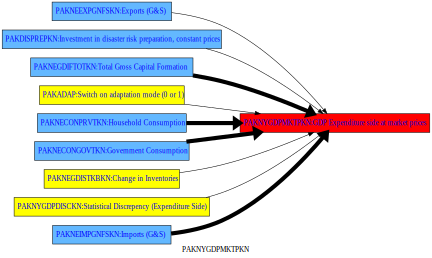

In [5]:
latex=0
mpak.PAKNYGDPMKTPKN.tracepre(png=latex)

:::{note}
**png=latex** 

The default behavior when displaying graphs in a *jupyter notebook* is to produce images in .svg format.
These images scale well and the mouseover
feature can be used. That is on mouseover the variable the equation for each variable is displayed
and on mouseover the edge the percent explanation for this variable is displayed

Unfortunately this *jupyter book* (that is not a notebook) can not be build into a latex and PDF  form using images in svg format.

In order when the version is made to a pdf file the latex variable has to be set to True in the start. If this notebook is used as a notebook set latex=0 and use the mouseover feature.
:::

### .tracepre(,,,filter=\<minimal impact>) Not all links are relevant. So the tree can be pruned.
Then only  links where the minimal impact is more than \<minimal impact> are show. 

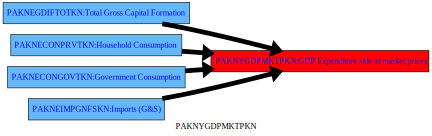

In [6]:
mpak.PAKNYGDPMKTPKN.tracepre(filter=20,png=latex)

### .tracepre(,,,up=\<upstream levels>) 
Combined with filter we can look behind the dependencies 

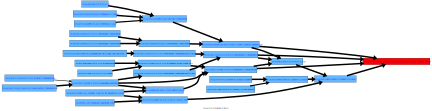

In [7]:
mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,up=3,png=latex)

### tracepre(,fokus2='variable pattern',growthshow=True) Additional information regarding selected variables
The data for selected nodes can be displayed by mentioning the variable in fokus2= and growthshow=True will ensure that growth rates are included.

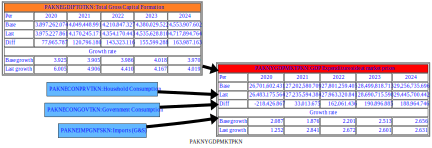

In [8]:
with mpak.set_smpl(2020,2024):
    mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,fokus2='PAKNEGDIFTOTKN PAKNYGDPMKTPKN',growthshow=True)

## .tracedep gives exactly the same for downstream (dependent variables) 

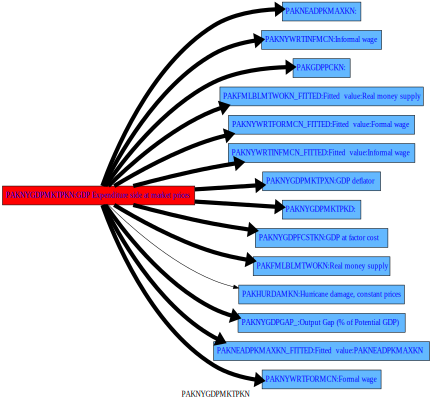

In [9]:
mpak.PAKNYGDPMKTPKN.tracedep()

## .modeldash() The really convenient  way to navigate the dependency graph
This is the way to navigate the dependency graph. You can point and click and much more

Unfortunately you can not run it from this manual. Only if you are running a notebook. 

In [10]:
try:
    with mpak.set_smpl(2022,2026):
        mpak.modeldash('PAKNYGDPMKTPKN',jupyter=True,inline=False)  # delete # if running a live notebook 
except Exception as e:
    print(f"Can't show modeldash \n{e}")

apprun
Dash app running on http://127.0.0.1:5001/


And it will look like this 

![dash.png](dash.png)

## Plot the adjacency matrix for current periode

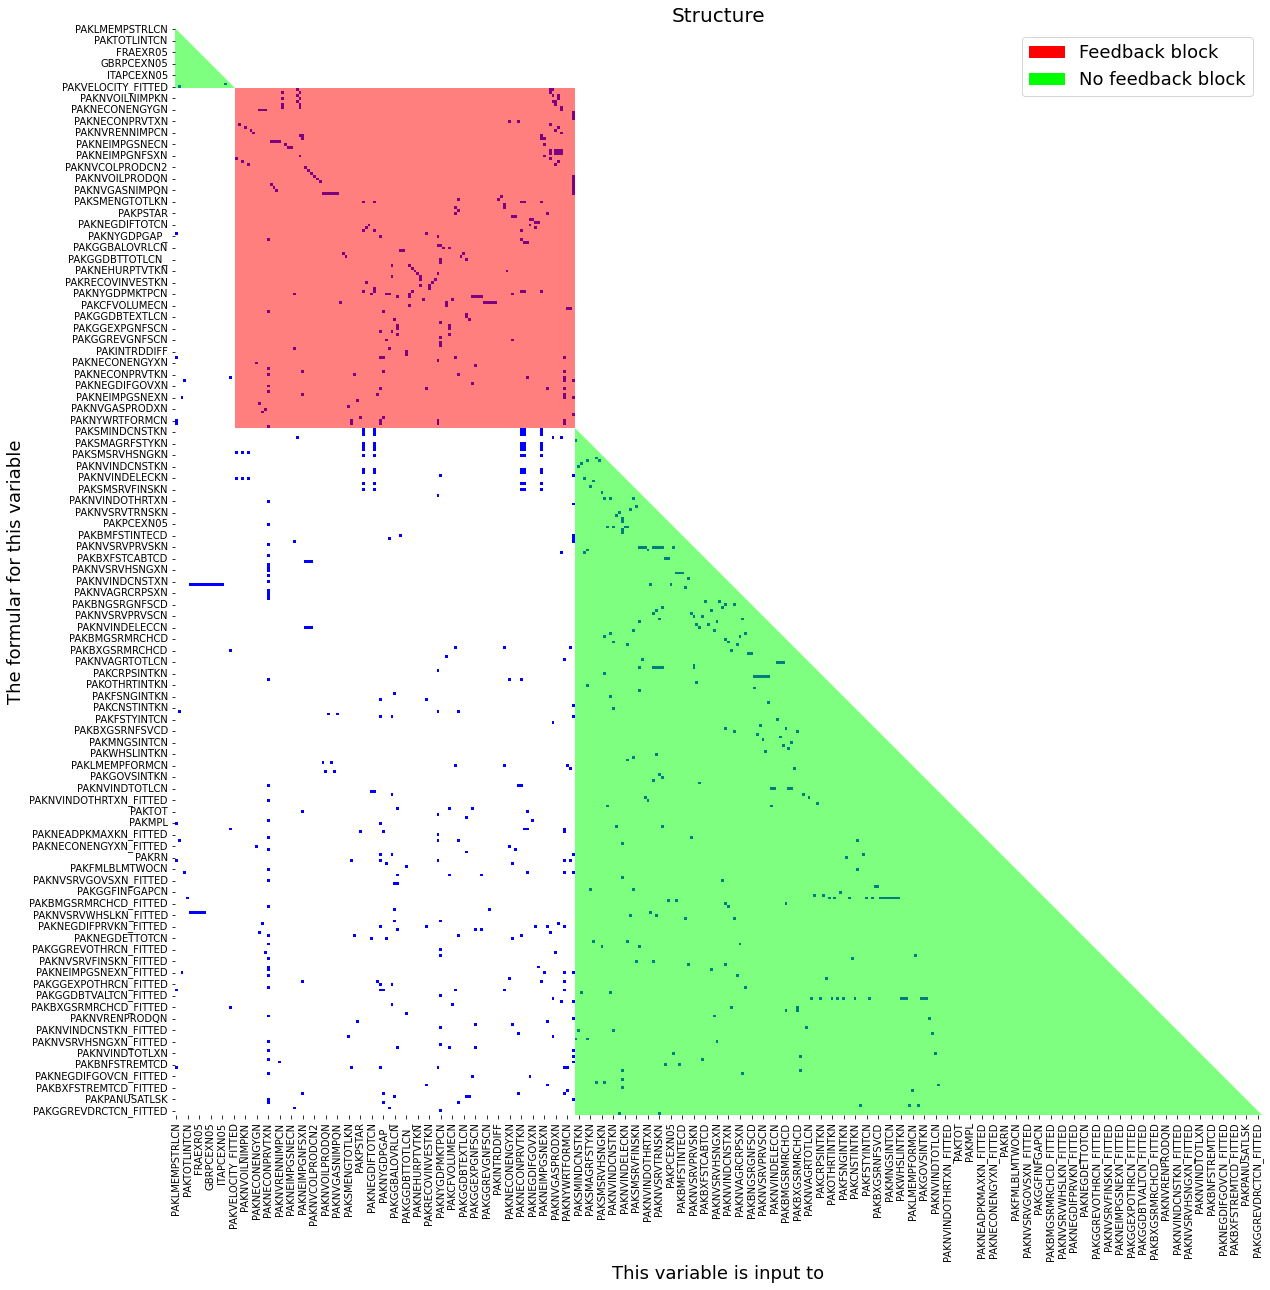

In [11]:
mpak.plotadjacency(size=(20,20),nolag=0);

## Plot the adjacency matrix including lagged effects


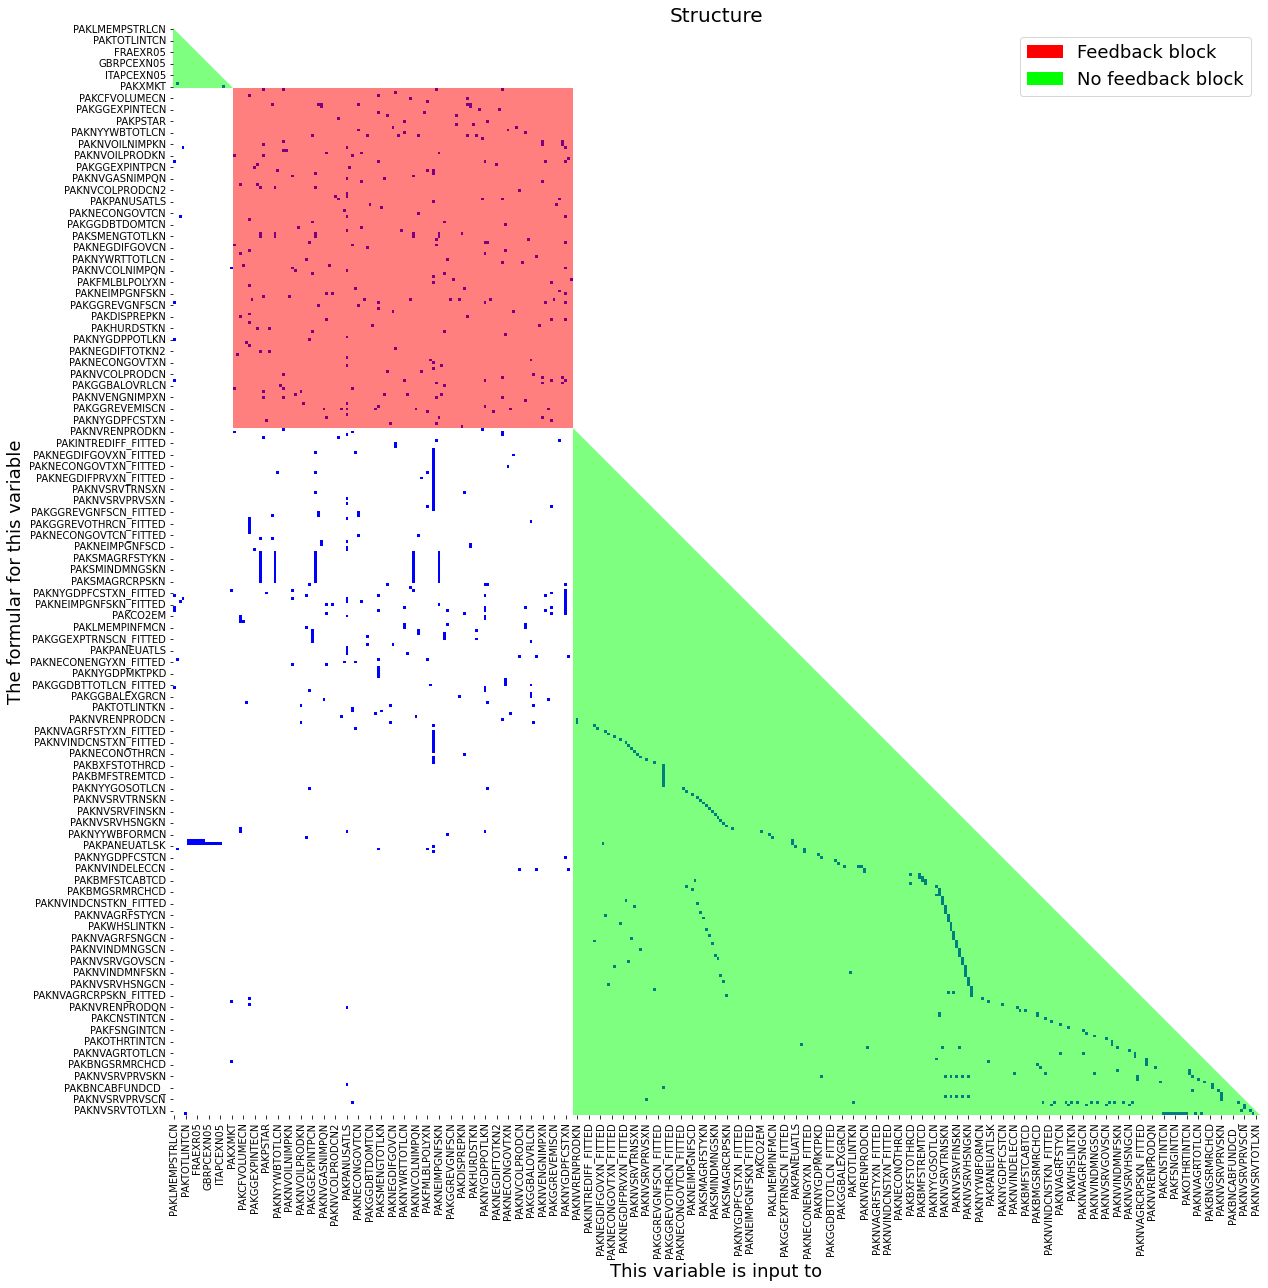

In [12]:
mpak.plotadjacency(size=(20,20),nolag=1);